# Ideal Dynamics of an End-mirror QOM System

In this notebook, the following topics are covered:

* The Heisenberg-Langevin Equations (HLE)
* The Quantum Optomechanics (QOM) Toolbox
* Writing the System Class with the QOM Toolbox
* Nonlinear Classical Dynamics
* Optomechanical Bistability
* Optomechanical Damping and Optical Spring Effect
* Correlations between the Quantum Fluctuations
* Optomechanical Entanglement
* Visualizing the Cached Dynamics

## The Heisenberg-Langevin Equations (HLE)

The Hamiltonian of a simple optomechanical system can be written as (refer to [our tutorial](https://arxiv.org/abs/2211.02596) for its derivation):
$$
H = - \hbar \Delta_{0} a^{\dagger} a + \hbar \omega_{m} b^{\dagger} b - \hbar g_{0} a^{\dagger} a \left( b^{\dagger} + b \right) + i \hbar A_{l} \left( a^{\dagger} - a \right),
$$
where $a$ ($b$) is the annihilation operator of the optical (mechanical) mode, $\Delta_{0}$ is the laser detuning, $\omega_{m}$ the mechanical resonance frequency, $g_{0}$ the optomechanical interaction strength and $A_{l}$ the laser amplitude.

In the linearized limit, this Hamiltonian can be represented by:
* Classical complex-valued modes ($\alpha$, $\beta$) obeying coupled differential equations.
* Quantum real-valued quadratures ($X$, $Y$, $Q$, $P$) whose correlations obey a simple matrix equation.

The coupled differential equations are
$$
\frac{d \alpha}{d \tau} = - \left( \frac{\kappa^{\prime}}{2} - i \Delta_{0}^{\prime} \right) \alpha + i g_{0}^{\prime} \alpha \left( \beta^{*} + \beta \right) + A_{l}^{\prime}, \\
\frac{d \beta}{d \tau} = - \left( \frac{\gamma^{\prime}}{2} + i \right) \beta + i g_{0}^{\prime} \alpha^{*} \alpha,
$$
where $\kappa$ ($\gamma$) are the optical decay (mechanical damping) rates.
The prime superscript denotes normalization with $\omega_{m}$ with $\tau = \omega_{m} t$.

The equation of the quadrature correlation can be simplified as
$$
\frac{d \mathbf{V}}{d \tau} = \mathbf{A}^{\prime} \mathbf{V} + \mathbf{V} \mathbf{A}^{\prime T} + \mathbf{D}^{\prime},
$$
where $\mathbf{V}_{jk} = \frac{1}{2} \langle u_{j} u_{k} + u_{k} u_{j} \rangle$, with $\mathbf{u} = (X, Y, Q, P)^{T}$, the normalized noise matrix $\mathbf{D}^{\prime} = \mathrm{Diag}[\kappa^{\prime} / 2, \kappa^{\prime} / 2, \gamma^{\prime} (n_{th} + 1 / 2), \gamma^{\prime} (n_{th} + 1 / 2)]$ with $n_{th}$ being the thermal mechanical vibration quanta, and the normalized drift matrix $\mathbf{A}^{\prime}$ is
$$
\begin{pmatrix}
    - \frac{\kappa^{\prime}}{2} & - \Delta^{\prime} & - 2 G_{0I}^{\prime} & 0 \\
    \Delta^{\prime} & - \frac{\kappa^{\prime}}{2} & 2 G_{0R}^{\prime} & 0 \\
    0 & 0 & - \frac{\gamma^{\prime}}{2} & \omega_{m}^{\prime} \\
    2 G_{0R}^{\prime} & 2 G_{0I}^{\prime} & - \omega_{m}^{\prime} & - \frac{\gamma^{\prime}}{2}
\end{pmatrix},
$$
where $\Delta^{\prime} = \Delta_{0}^{\prime} + g_{0}^{\prime} ( \beta^{*} + \beta )$ and $G_{0R}^{\prime}$ ($G_{0I}^{\prime}$) are the real (imaginary) parts of $G_{0}^{\prime} = g_{0}^{\prime} \alpha$.

## The Quantum Optomechanics (QOM) Toolbox 

The Quantum Optomechanics Toolbox, packaged as [`qom`](https://github.com/sampreet/qom), is a wrapper-styled toolbox to simulate the classical and quantum dynamics of optomechanical models in a scalable manner.
Its key features include:
* Automatically managed loops and parameter validation modules.
* Solver modules to calculate classical and quantum signatures.
* Inheritable optomechanical systems supporting callable properties.
* Configurable visualizations without the need for explicit plotting.

Let's initialize the library...

In [1]:
# qom moduleseasdfa
from qom.ui import init_log
# initialize log
init_log()

MainThread               INFO    2022-11-16 20:09:57.127: (qom.ui.log) -------------------------------------------------Logger Initialized


## Writing the System Class with the QOM Toolbox

The dynamics are best calculated when the system is written as an inherited class containing methods to obtain the drift matrix $A$ (`get_A`), the initial values of the variables and the constants of the system including the noise matrix $D$ and the parameters (`get_ivc`) and the rate equations of the classical dynamics (`get_mode_rates`).
For example, a typical optomechanical system following the HLEs defined in the previous section can be written as the [EM_00 class](https://github.com/Sampreet/som-systems/blob/master/systems/EM_00.py) which is a child of the .
Let's import this system...

In [2]:
# import dependencies
import os
import sys
# adding the path to the system
sys.path.append(os.path.abspath(os.path.join('../../../som-systems/')))
# import system
from systems import EM_00

## Nonlinear Classical Dynamics

We next initialize the system with some values of the parameters and run the `HLESolver` module included in the library to obtain the dynamics of the system.
The `get_measure_dynamics` method wraps this process and returns the required dynamics.
Let us plot the mode dynamics of $(\beta^{*} + \beta) / 2$ (which also corresponds to the classical position $q$ of the mechanical oscillator) by setting the parameter `idx_e` to `1`, $\beta$ falling in the `measure_type` of classical mode amplitude, coded as `'mode_amp'`.

Here, the dynamics are calculated using the FORTRAN submodule `zvode` upto $\tau_{max} = 1000.0$ with $10001$ values from $0$ to $\tau_{max}$ and saved as a compressed NumPy array into the `data/em_00/0.0_1000.0_10001` folder.
Note that the calculated dynamics are returned with the first axis corresponding to the number of time step (to facilitate `idx_e` taking a list of mode indices and returning the dynamics of each as list of values for each time step).
The plotting is done using the `MPLPlotter` module of `qom` integrated into the method, taking only the `'real'` components of the amplitudes for `component`.

MainThread               INFO    2022-11-16 20:09:59.738: (qom.solvers.HLESolver) ------------------------------------------Results Loaded	
MainThread               INFO    2022-11-16 20:09:59.904: (qom.systems.BaseSystem) --------------------------------------Measures Obtained	
MainThread               INFO    2022-11-16 20:09:59.938: (qom.ui.plotters.MPLPlotter) -----Plotting only Real Parts of the Complex Values	


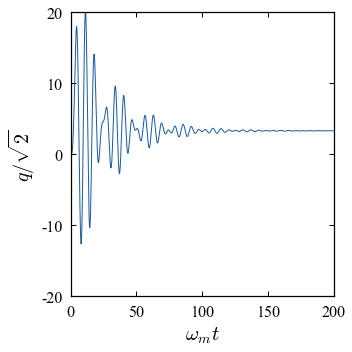

In [3]:
# solver parameters
solver_params = {
    'show_progress': True,
    'cache': True,
    'cache_dir': '../../data/em_00/0.0_1000.0_10001',
    'method': 'zvode',
    'measure_type': 'mode_amp',
    'idx_e': 1,
    't_min': 0.0,
    't_max': 1000.0,
    't_dim': 10001
}
# system parameters
system_params = {
    'A_l_norm': 25.0,
    'Delta_0_norm': -1.0, 
    'g_0_norm': 0.005,
    'gamma_norm': 0.005,
    'kappa_norm': 0.15,
    'T_norm': 0.0
}

# initialize system
system = EM_00(params=system_params)
# get classical mode amplitudes and plot real components
M, T = system.get_measure_dynamics(solver_params=solver_params, plot=True, plotter_params={
    'x_label': '$\\omega_{m} t$',
    'x_ticks': list(range(0, 201, 50)),
    'v_label': '$q / \\sqrt{2}$',
    'v_ticks': list(range(-20, 21, 10)),
    'component': 'real',
    'width': 5.0
})

Similarly, the imagnary component of $\beta$ can be obtained which is related the momentum $p$ of the mechanical oscillator.

MainThread               INFO    2022-11-16 20:10:00.476: (qom.ui.plotters.MPLPlotter) Plotting only Imaginary Parts of the Complex Values	


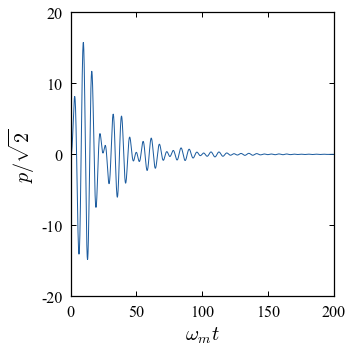

In [4]:
# plot imaginary components
_ = system.plot_dynamics(plotter_params={
    'x_label': '$\\omega_{m} t$',
    'x_ticks': list(range(0, 201, 50)),
    'v_label': '$p / \\sqrt{2}$',
    'v_ticks': list(range(-20, 21, 10)),
    'component': 'imag',
    'width': 5.0
}, V=M, T=T)

In the above simulation, the dynamical variable $\beta$ can be seen to settle down to a fixed point after an initial transient.
This can be represented in the phase-space trajectory by ploting both the components, which represent position and momentum, simultaneously.
Let us utilize the `MPLPlotter` module of `qom` directly to plot the phase trajectory of $\beta$...

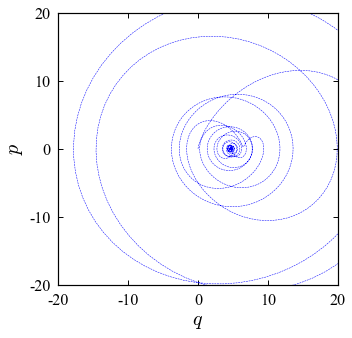

In [5]:
# import dependencies
from qom.ui.plotters import MPLPlotter
import numpy as np

# extract position and momentum values after the transient
q_fp = (np.sqrt(2) * np.real(np.transpose(M)[0])).tolist()
p_fp = (np.sqrt(2) * np.imag(np.transpose(M)[0])).tolist()

# initialize the plotter
plotter = MPLPlotter(axes={}, params={
    'type': 'lines',
    'x_label': '$q$',
    'x_ticks': list(range(-20, 21, 10)),
    'y_colors': ['b', 'r'],
    'y_sizes': [0.5, 1],
    'y_styles': ['--', '-'],
    'v_label': '$p$',
    'v_ticks': list(range(-20, 21, 10)),
    'width': 5.0
})
# update and show
plotter.update(xs=[q_fp, q_fp[-628:]], vs=[p_fp, p_fp[-628:]])
plotter.show(True)

It can be seen here that the trajectory eventually settles at a fixed point. 

On the other hand, if we vary the parameter slightly (say increase $A_{l}$ to $50.0 \omega_{m}$), the real and imaginary components settle down to an oscillatory state.
Let us see how the phase-space trajectory of such dynamics looks like...

MainThread               INFO    2022-11-16 20:10:01.022: (qom.solvers.HLESolver) ------------------------------------------Results Loaded	
MainThread               INFO    2022-11-16 20:10:01.202: (qom.systems.BaseSystem) --------------------------------------Measures Obtained	


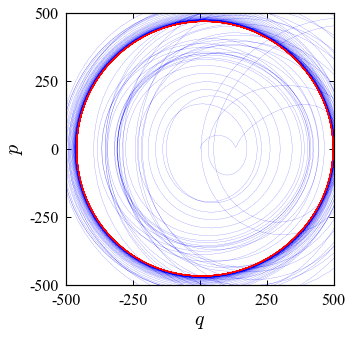

In [6]:
# update system parameter
system_params.update({'A_l_norm': 50.0})
# reinitialize system
system = EM_00(params=system_params)
# get classical mode amplitudes
M, T = system.get_measure_dynamics(solver_params=solver_params)
# extract position and momentum values after the transient
q_lc = (np.sqrt(2) * np.real(np.transpose(M)[0])).tolist()
p_lc = (np.sqrt(2) * np.imag(np.transpose(M)[0])).tolist()

# initialize the plotter
plotter = MPLPlotter(axes={}, params={
    'type': 'lines',
    'x_label': '$q$',
    'x_ticks': list(range(-500, 501, 250)),
    'y_colors': ['b', 'r'],
    'y_sizes': [0.2, 1],
    'y_styles': ['--', '-'],
    'v_label': '$p$',
    'v_ticks': list(range(-500, 501, 250)),
    'width': 5.0
})
# update and show
plotter.update(xs=[q_lc, q_lc[-628:]], vs=[p_lc, p_lc[-628:]])
plotter.show(True)

Here, the last few oscillations are marked in red.
It can be seen that the trajectory traces a closed loop, known as limit cycles.
If we increase the amplitudes further, the system becomes unstable.

However, if we increase the value of the amplitude further (say $A_l = 100.0 \omega_{m}$) for a highly dissipative cavity (say $\kappa = \omega_{m}$), the dynamics does not converge and in certain cases, displays chaotic behaviour.
This can be viewed below.

MainThread               INFO    2022-11-16 20:10:01.601: (qom.solvers.HLESolver) ------------------------------------------Results Loaded	
MainThread               INFO    2022-11-16 20:10:01.691: (qom.systems.BaseSystem) --------------------------------------Measures Obtained	


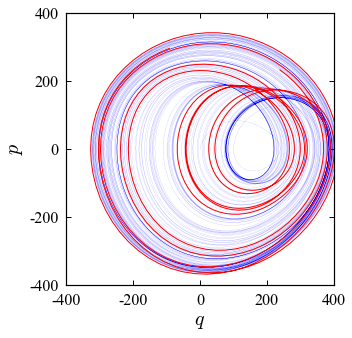

In [7]:
# update system parameter
system_params.update({
    'A_l_norm': 100.0,
    'kappa_norm': 1.0
})
# reinitialize system
system = EM_00(params=system_params)
# get classical mode amplitudes
M, T = system.get_measure_dynamics(solver_params=solver_params)
# extract position and momentum values after the transient
q_cb = (np.sqrt(2) * np.real(np.transpose(M)[0])).tolist()
p_cb = (np.sqrt(2) * np.imag(np.transpose(M)[0])).tolist()

# initialize the plotter
plotter = MPLPlotter(axes={}, params={
    'type': 'lines',
    'x_label': '$q$',
    'x_ticks': list(range(-400, 401, 200)),
    'y_colors': ['b', 'r'],
    'y_sizes': [0.1, 1],
    'y_styles': ['--', '-'],
    'v_label': '$p$',
    'v_ticks': list(range(-400, 401, 200)),
    'width': 5.0
})
# update and show
plotter.update(xs=[q_cb, q_cb[-628:]], vs=[p_cb, p_cb[-628:]])
plotter.show(True)

## Optomechanical Bistability

In the adiabatic limit ($\kappa \gg \gamma, g_{0}$), the classical modes can be expressed as steady state values 
$$
\alpha_{s} = \frac{A_{l}}{\frac{\kappa}{2} - i \Delta}, \\
\beta_{s} = \frac{i g_{0} \left| \alpha_{s} \right|^{2}}{\frac{\gamma}{2} + i \omega_{m}}.
$$

These equations can be simplified as a cubic in $N_{o} = | \alpha_{s} |^{2}$ given by
$$
4 C^{2} N^{3} + 8 C \Delta_{0} N^{2} + ( 4 \Delta_{0}^{2} + \kappa^{2} ) N - 4 \left| A_{l} \right|^{2} = 0,
$$
where $C = 2 g_{0}^{2} \omega_{m} / ( \gamma^{2} / 4 + \omega_{m}^{2} )$.
We can obtain the solutions to this cubic equation for different values of $\Delta_{0}$ by using the `get_mean_optical_occupancies` method to solve the cubic equation of the system (requires the `get_oss_modes` method in [EM_00 class](../../systems/EM_00.py)) as shown below:

MainThread               INFO    2022-11-16 20:10:02.174: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2022-11-16 20:10:02.310: (qom.loopers.XLooper) ------------------------------------------Results Obtained	


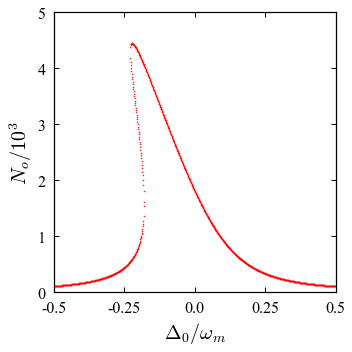

In [8]:
# import dependencies
from qom.loopers import XLooper

# looper parameters
looper_params = {
    'show_progress_x': True,
    'X': {
        'var': 'Delta_0_norm',
        'val': np.linspace(-0.5, 0.5, 1001)
    }
}
# system parameters
system_params = {
    'A_l_norm': 5.0,
    'Delta_0_norm': -1.0, 
    'g_0_norm': 0.005,
    'gamma_norm': 0.005,
    'kappa_norm': 0.15,
    'T_norm': 0.0
}

# function to obtain the mean optical occupancies
def func_moo(system_params, val, logger, results):
    # reinitialize system
    system = EM_00(params=system_params)
    # get mean optical occupancies
    N_os, _ = system.get_mean_optical_occupancies(method='cubic')
    # update results
    results.append((val, N_os))

# initialize the looper
looper = XLooper(func=func_moo, params={
    'looper': looper_params,
    'system': system_params,
    'plotter': {
        'type': 'scatters',
        'x_label': '$\\Delta_{0} / \\omega_{m}$',
        'x_ticks': [-0.5, -0.25, 0.0, 0.25, 0.5],
        'y_colors': ['r'],
        'v_label': '$N_{o} / 10^{3}$',
        'v_tick_labels': list(range(0, 6)),
        'v_ticks': list(range(0, 5001, 1000)),
        'width': 5.0
    }
})
# loop the parameters
results = looper.loop()
# plot the results
plotter = looper.plot_results()

Together with variation in the optomechanical strength $g_{0}$, a similar plot can be quickly obtained by using the modules available in `qom.utils.looper` which wrap some of the common functions for optomechanical systems.
A complete inline script looks something like this...

MainThread               INFO    2022-11-16 20:10:02.541: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2022-11-16 20:10:04.926: (qom.loopers.XYLooper) -----------------------------------------Results Obtained	


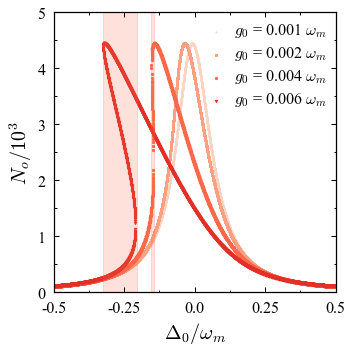

In [9]:
# import dependencies
from qom.utils.looper import wrap_looper

# run looper and plot
looper = wrap_looper(SystemClass=EM_00, params={
    'looper': {
        'show_progress_xy': True,
        'X': {
            'var': 'Delta_0_norm',
            'min': -0.5,
            'max': 0.5,
            'dim': 5001,
        },
        'Y': {
            'var': 'g_0_norm',
            'val': [0.001, 0.002, 0.004, 0.006]
        }
    },
    'system': system_params,
    'plotter': {
        'type': 'scatters',
        'palette': 'Reds',
        'bins': 5,
        'x_label': '$\\Delta_{0} / \\omega_{m}$',
        'x_ticks': [i * 0.25 - 0.5 for i in range(5)],
        'x_ticks_minor': [i * 0.125 - 0.5 for i in range(9)],
        'y_name': '$g_{0}$',
        'y_sizes': [5] * 4,
        'y_unit': '$\\omega_{m}$',
        'v_label': '$N_{o} / 10^{3}$',
        'v_tick_labels': list(range(0, 6)),
        'v_ticks': list(range(0, 5001, 1000)),
        'v_ticks_minor': list(range(0, 5001, 500)),
        'show_legend': True,
        'width': 5.0,
        'vspan': [{
            'xmin': -0.325, 
            'xmax': -0.205,
            'color_idx': 2,
            'alpha': 0.2
        }, {
            'xmin': -0.155, 
            'xmax': -0.145,
            'color_idx': 2,
            'alpha': 0.2
        }]
    }
}, func='moo', looper='XYLooper', plot=True)

One can then plot the optical stability zones for different values of $\Delta_{0}$ and $A_{l}$ as follows...

MainThread               INFO    2022-11-16 20:10:06.192: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2022-11-16 20:10:06.209: (qom.loopers.BaseLooper) -----------------------------------------Results Loaded	


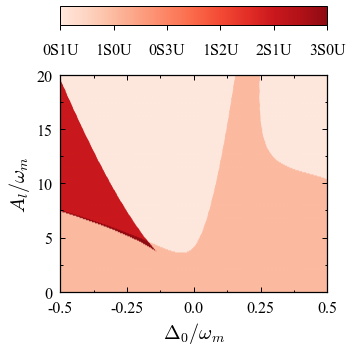

In [10]:
# run looper and plot
looper = wrap_looper(SystemClass=EM_00, params={
    'looper': {
        'show_progress_xy': True,
        'X': {
            'var': 'Delta_0_norm',
            'min': -0.5,
            'max': 0.5,
            'dim': 1001,
        },
        'Y': {
            'var': 'A_l_norm',
            'min': 0.0,
            'max': 20.0,
            'dim': 201
        }
    },
    'system': system_params,
    'plotter': {
        'type': 'pcolormesh',
        'palette': 'Reds',
        'x_label': '$\\Delta_{0} / \\omega_{m}$',
        'x_ticks': [i * 0.25 - 0.5 for i in range(5)],
        'x_ticks_minor': [i * 0.125 - 0.5 for i in range(9)],
        'y_label': '$A_{l} / \\omega_{m}$',
        'y_ticks': list(range(0, 21, 5)),
        'y_ticks_minor': [i * 2.5 for i in range(9)],
        'show_cbar': True,
        'cbar_position': 'top',
        'cbar_tick_labels': ['0S1U', '1S0U', '0S3U', '1S2U', '2S1U', '3S0U'],
        'cbar_ticks': [0, 1, 2, 3, 4, 5],
        'width': 5.0
    }
}, func='osz', file_path_prefix='../../data/em_00/osz', looper='XYLooper', plot=True)

## Optomechanical Damping and Optical Spring Effect

Two charasteristic outcomes of the optomechanical interaction are the optomechanical damping and the optical spring effect. 
In the first case, the linear mechanical response contains an extra damping term which results in the heating or cooling of the mechanical motion.
This optomechanical damping rate is given as
$$
\gamma_{om} = g_{s}^{2} \kappa \left\{ \frac{1}{\kappa^{2} / 4 + \left( \omega_m + \Delta \right)} - \frac{1}{\kappa^{2} / 4 + \left( \omega_m - \Delta \right)} \right\}.
$$

In the second scenario, the frequency of the mechanical oscillator gets shifted due to the optical field by an amount of
$$
\delta \omega_{m} = g_{s}^{2} \kappa \left\{ \frac{\omega_{m} + \Delta}{\kappa^{2} / 4 + \left( \omega_m + \Delta \right)} - \frac{\omega_{m} - \Delta}{\kappa^{2} / 4 + \left( \omega_m - \Delta \right)} \right\}.
$$
This shift results in the softening or hardening of the mechanical spring constant.

By defining the custom methods `get_optomechanical_damping_rate_norm` and `get_optomechanical_frequency_shift_norm` in our [EM_00 class](../../systems/EM_00.py) to calculate and return the normalized damping rate and the normalized frequency shift respectively, we can obtain the typical behaviour of these curves with change in the detuning as shown below:

MainThread               INFO    2022-11-16 20:10:08.119: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2022-11-16 20:10:08.816: (qom.loopers.XYLooper) -----------------------------------------Results Obtained	


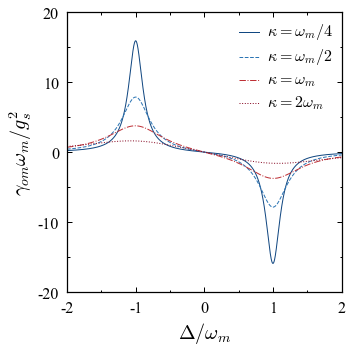

MainThread               INFO    2022-11-16 20:10:09.215: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2022-11-16 20:10:09.893: (qom.loopers.XYLooper) -----------------------------------------Results Obtained	


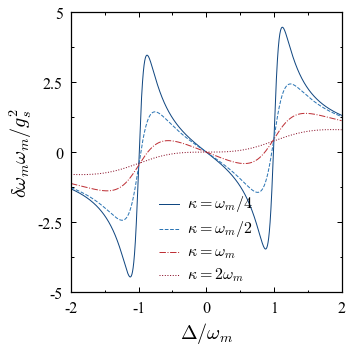

In [11]:
# all parameters
params = {
    'looper': {
        'show_progress_xy': True,
        'X': {
            'var': 'Delta_0_norm',
            'min': -2.0,
            'max': 2.0,
            'dim': 4001,
        },
        'Y': {
            'var': 'kappa_norm',
            'val': [0.25, 0.5, 1.0, 2.0]
        }
    },
    'system': system_params,
    'plotter': {
        'type': 'lines',
        'bins': 21,
        'x_label': '$\\Delta / \\omega_{m}$',
        'x_ticks': [i - 2 for i in range(5)],
        'x_ticks_minor': [i * 0.5 - 2.0 for i in range(9)],
        'y_colors': [0, 2, -3, -1],
        'y_legend': [
            '$\kappa = \omega_{m} / 4$', 
            '$\kappa = \omega_{m} / 2$', 
            '$\kappa = \omega_{m}$', 
            '$\kappa = 2 \omega_{m}$'
        ],
        'y_sizes': [1] * 4,
        'show_legend': True,
        'width': 5.0
    }
}

# looper for optomechanical damping rate
params['plotter'].update({
    'v_label': '$\\gamma_{om} \\omega_{m} / g_{s}^{2}$',
    'v_ticks': [-20, -10, 0, 10, 20],
    'v_ticks_minor': [i * 5 - 20 for i in range(9)]
})
looper = wrap_looper(SystemClass=EM_00, params=params, func='optomechanical_damping_rate_norm', looper='XYLooper', plot=True)

# looper for optomechanical frequency shift
params['plotter'].update({
    'v_label': '$\\delta \\omega_{m} \\omega_{m} / g_{s}^{2}$',
    'v_ticks': [-5, -2.5, 0, 2.5, 5],
    'v_ticks_minor': [i * 1.25 - 5 for i in range(9)]
})
looper = wrap_looper(SystemClass=EM_00, params=params, func='optomechanical_frequency_shift_norm', looper='XYLooper', plot=True)

## Correlations between the Quantum Fluctuations

The correlations between the quantum fluctuations are simulated through the correlation matrix $\mathbf{V}$.
The following script demonstrates the simulation of quantum correlations by calculating the dynamical and stationary values of the variances in position and momentum of the mechanical mode, which correspond to the elements $\mathbf{V}_{22}$ and $\mathbf{V}_{33}$ respectively.

MainThread               INFO    2022-11-16 20:10:10.504: (qom.solvers.HLESolver) ------------------------------------------Results Loaded	
MainThread               INFO    2022-11-16 20:10:10.594: (qom.systems.BaseSystem) --------------------------------------Measures Obtained	


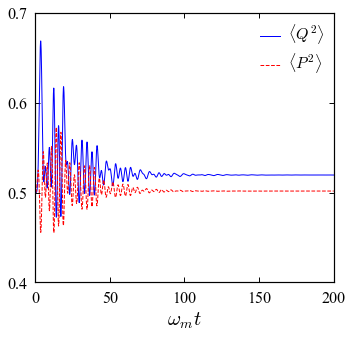

In [12]:
# update system params
system_params.update({
    'A_l_norm': 25.0,
})
# update solver params
solver_params.update({
    'measure_type': 'corr_ele',
    'idx_e': [(2, 2), (3, 3)]
})

# initialize system
system = EM_00(params=system_params)
# get measure dynamics
M, T = system.get_measure_dynamics(solver_params=solver_params)
# extract values
Q_2_expect_d = np.transpose(M)[0].tolist()
P_2_expect_d = np.transpose(M)[1].tolist()

# initialize the plotter
plotter = MPLPlotter(axes={
    'X': T,
    'Y': list(range(2))
}, params={
    'type': 'lines',
    'x_label': '$\\omega_{m} t$',
    'x_ticks': list(range(0, 201, 50)),
    'y_colors': ['b', 'r'],
    'y_styles': ['-', '--'],
    'y_legend': ['$\\langle Q^{2} \\rangle$', '$\\langle P^{2} \\rangle$'],
    'v_ticks': [0.4, 0.5, 0.6, 0.7],
    'show_legend': True,
    'width': 5.0
})
# update and show
plotter.update(xs=T, vs=[Q_2_expect_d, P_2_expect_d])
plotter.show(hold=True)

## Optomechanical Entanglement

To study the nature of quantum entanglement between the optical and mechanical modes, we utilize the logarithmic negativity measure defined for the bipartite matrix $V$ written in the standard form
$$
\mathbf{V} = \begin{pmatrix}
    \mathcal{A} & \mathcal{C} \\
    \mathcal{C}^{T} & \mathcal{B}
\end{pmatrix},
$$
where $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ are $2 \times 2$ matrices.
The degree of entanglement is then quantified by the figure of merit
$$
E_{N} = \mathrm{max} \left[ 0, - \ln \left( 2 \mu^{-} \right) \right],
$$ 
where $\mu^{-} = 2^{-1/2} \left\{ \Sigma - \sqrt{\Sigma^{2} - 4 \mathrm{det} \left[ \mathbf{V} \right]} \right\}$ with $\Sigma = \mathrm{det} \left[ \mathcal{A} \right] + \mathrm{det} \left[ \mathcal{B} \right] - 2 \mathrm{det} \left[ \mathcal{C} \right]$.

Let us utlilize the drift matrix already defined in our [EM_00 class](../../systems/EM_00.py) to obtain the dynamics of this measure between the optical (indexed `0`) and mechanical (indexed `1`) modes:

MainThread               INFO    2022-11-16 20:10:11.048: (qom.solvers.HLESolver) ------------------------------------------Results Loaded	
MainThread               INFO    2022-11-16 20:10:11.964: (qom.systems.BaseSystem) --------------------------------------Measures Obtained	


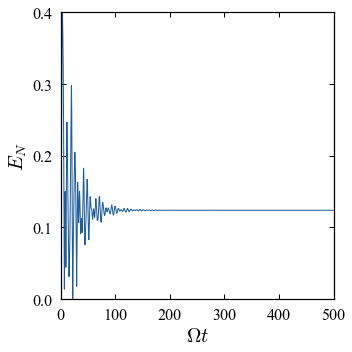

In [13]:
# update solver params
solver_params.update({
    'measure_type': 'entan_ln',
    'idx_e': (0, 1)
})
# all parameters
params = {
    'solver': solver_params,
    'system': system_params,
    'plotter': {
        'type': 'lines',
        'x_label': '$\\Omega t$',
        'x_ticks': [100 * i for i in range(6)],
        'v_label': '$E_{N}$',
        'v_ticks': [0.0, 0.1, 0.2, 0.3, 0.4],
        'width': 5.0
    }
}

# initialize system
system = EM_00(params=params['system'])
# get measure dynamics
M, T = system.get_measure_dynamics(solver_params=params['solver'], plot=True, plotter_params=params['plotter'])

One can also obtain the steady state values of entanglement in the stable regions of the system without having to define any function.
We demonstrate this using the wrapped functions available in `qom.utils.looper` module in the execution below:

MainThread               INFO    2022-11-16 20:10:12.340: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2022-11-16 20:10:12.348: (qom.loopers.BaseLooper) -----------------------------------------Results Loaded	
MainThread               INFO    2022-11-16 20:10:12.349: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2022-11-16 20:10:12.395: (qom.loopers.BaseLooper) -----------------------------------------Results Loaded	


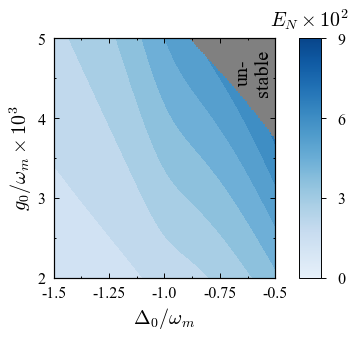

In [14]:
# all parameters
params = {
    'looper': {
        'show_progress_y': True,
        'X': {
            'var': 'Delta_0_norm',
            'min': -2.0,
            'max': 0.0,
            'dim': 201
        },
        'Y': {
            'var': 'g_0_norm',
            'min': 0.002,
            'max': 0.005,
            'dim': 301
        }
    },
    'solver': {
        'measure_type': 'entan_ln',
        'idx_e': (0, 1)
    },
    'system': {
        'A_l_norm': 10.0,
        'Delta_0_norm': -1.0, 
        'g_0_norm': 0.005,
        'gamma_norm': 0.005,
        'kappa_norm': 0.15,
        'T_norm': 0.0
    },
    'plotter': {
        'type': 'contourf',
        'palette': 'Blues',
        'x_label': '$\\Delta_{0} / \\omega_{m}$',
        'x_ticks': [i * 0.25 - 1.5 for i in range(5)],
        'x_ticks_minor': [i * 0.125 - 1.5 for i in range(9)],
        'y_label': '$g_{0} / \\omega_{m} \\times 10^{3}$',
        'y_tick_labels': list(range(2, 6)),
        'y_ticks': [i * 0.001 + 0.002 for i in range(4)],
        'y_ticks_minor': [i * 0.0005 + 0.002 for i in range(7)],
        'show_cbar': True,
        'cbar_title': '$E_{N} \\times 10^{2}$',
        'cbar_tick_labels': [0, 3, 6, 9],
        'cbar_ticks': [0.00, 0.03, 0.06, 0.09],
        'width': 5.0,
        'annotations': [{
            's': 'un-\nstable',
            'xy': (0.655, 0.725),
            'rotation': 'vertical'
        }]
    }
}

# get optical stability zones
looper = wrap_looper(SystemClass=EM_00, params=params, func='osz', file_path_prefix='../../data/em_00/osz', looper='XYLooper')
osz = looper.results['V']

# get steady-state entanglement
looper = wrap_looper(SystemClass=EM_00, params=params, func='mss', file_path_prefix='../../data/em_00/entan_ln_ss', looper='XYLooper')
mss = looper.results['V']
vs = [[mss[i][j][0] if osz[i][j] == 1 else np.nan for j in range(len(mss[i]))] for i in range(len(mss))]

# plotter
plotter = MPLPlotter(axes={
    'X': looper.axes['X']['val'],
    'Y': looper.axes['Y']['val']
}, params=params['plotter'])
plotter.update(vs=vs)
plotter.show(True)

## Visualizing the Cached Dynamics

The dynamics for each set of parameters is saved temporarily in the [data](../../data) folder.
By default, the folder contains folders for each model saved by a codenamed defined in the model's class as `sys_xx` (e.g., `em_00` for `EM_00`).
Then, folders corresponding to the time series taken are written in the `min_max_dim` format.
Inside this, the compressed NumPy arrays are written with the choronological order of parameters as defined in the class constructor of the model.
This default structure can be summed up as
```
data/
├───sys_xx/
│   ├───min_max_dim/
│   │   ├───V_foo_bar.npz
│   │   └───...
│   └───...
└───...
```

Each NumPy file contains the dynamics of the classical mode amplitudes (say $n$ in number) and the quantum quadrature correlations ($4 n^{2}$ in number).
As such, the current model generates time series data for 18 elements ($n=2$).
Let us visualize this using `pandas`...

In [15]:
# import dependencies
import pandas as pd
# get file name for first set of system parameters
file_name = 'V'
for key in system_params:
    file_name += '_' + str(system_params[key])
# load numpy array
V_np = np.load('../../data/em_00/0.0_1000.0_10001/' + file_name + '.npz')['arr_0']
# extract complex-valued modes
V_np_modes = V_np[:, :2]
# extract real-valued correlations
V_np_corrs = np.real(V_np[:, 2:])
# generate column names for correlations
corrs = ['<{}{} + {}{}> / 2'.format(a, b, b, a) for a in ['X', 'Y', 'Q', 'P'] for b in ['X', 'Y', 'Q', 'P']]
# create a DataFrame for the dynamics
pd.DataFrame(V_np_modes, columns=['alpha', 'beta']).join(pd.DataFrame(V_np_corrs, columns=corrs))

,alpha,beta,<XX + XX> / 2,<XY + YX> / 2,<XQ + QX> / 2,<XP + PX> / 2,<YX + XY> / 2,<YY + YY> / 2,<YQ + QY> / 2,<YP + PY> / 2,<QX + XQ> / 2,<QY + YQ> / 2,<QQ + QQ> / 2,<QP + PQ> / 2,<PX + XP> / 2,<PY + YP> / 2,<PQ + QP> / 2,<PP + PP> / 2
0,0.000000+0.000000j,0.000000+0.000000j,0.500000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.500000
1,2.486507-0.124273j,0.000026+0.001035j,0.500000,6.151651e-08,0.000062,0.000618,6.151651e-08,0.500001,0.000618,-0.000062,0.000062,0.000618,0.500000,3.097170e-08,0.000618,-0.000062,3.097170e-08,0.500001
2,4.929792-0.493383j,0.000412+0.008206j,0.500000,1.918090e-06,0.000489,0.002417,1.918090e-06,0.500012,0.002417,-0.000489,0.000489,0.002417,0.500000,9.781207e-07,0.002417,-0.000489,9.781207e-07,0.500012
3,7.306133-1.099997j,0.002068+0.027402j,0.500003,1.404512e-05,0.001622,0.005254,1.404512e-05,0.500057,0.005254,-0.001622,0.001622,0.005254,0.500001,7.298734e-06,0.005254,-0.001622,7.298734e-06,0.500060
4,9.592833-1.934509j,0.006476+0.064132j,0.500017,5.646953e-05,0.003756,0.008910,5.646953e-05,0.500170,0.008909,-0.003756,0.003756,0.008909,0.500004,3.009196e-05,0.008910,-0.003756,3.009196e-05,0.500185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,1.994132-25.704746j,3.323532+0.008309j,0.500382,-2.810095e-03,0.010680,-0.066355,-2.810095e-03,0.517974,-0.068634,-0.005353,0.010680,-0.068634,0.519500,4.875162e-05,-0.066355,-0.005353,4.875162e-05,0.501645
9997,1.994132-25.704746j,3.323532+0.008309j,0.500382,-2.810095e-03,0.010680,-0.066355,-2.810095e-03,0.517974,-0.068634,-0.005353,0.010680,-0.068634,0.519500,4.875157e-05,-0.066355,-0.005353,4.875157e-05,0.501645
9998,1.994132-25.704746j,3.323532+0.008309j,0.500382,-2.810095e-03,0.010680,-0.066355,-2.810095e-03,0.517974,-0.068634,-0.005353,0.010680,-0.068634,0.519500,4.875141e-05,-0.066355,-0.005353,4.875141e-05,0.501645
9999,1.994132-25.704746j,3.323532+0.008309j,0.500382,-2.810094e-03,0.010680,-0.066355,-2.810094e-03,0.517974,-0.068634,-0.005353,0.010680,-0.068634,0.519500,4.875115e-05,-0.066355,-0.005353,4.875115e-05,0.501645
